#### Chatbot

- In this project, we are going to work with a dataset medic_q_a.csv, a questions and answer.
- MedQuad dataset contains questions and answers related to medical conditions, treatments, and protocols
- Dataset can be found at : https://huggingface.co/datasets/keivalya/MedQuad-MedicalQnADataset
  

In [3]:
#Import our libraries
import pandas as pd
import numpy as np
import string
import nltk
import re

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics.pairwise import cosine_similarity
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     /home/31654f48-8122-43f0-a3ab-
[nltk_data]     92b0c3e394d6/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/31654f48-8122-43f0-a3ab-
[nltk_data]     92b0c3e394d6/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /home/31654f48-8122-43f0-a3ab-
[nltk_data]     92b0c3e394d6/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [7]:
#Read the CSV file
df = pd.read_csv('medic_q_a.csv')

#display the top 10 of the dataframe
df.head(10)

,qtype,Question,Answer
0,susceptibility,Who is at risk for Lymphocytic Choriomeningiti...,LCMV infections can occur after exposure to fr...
1,symptoms,What are the symptoms of Lymphocytic Choriomen...,LCMV is most commonly recognized as causing ne...
2,susceptibility,Who is at risk for Lymphocytic Choriomeningiti...,Individuals of all ages who come into contact ...
3,exams and tests,How to diagnose Lymphocytic Choriomeningitis (...,"During the first phase of the disease, the mos..."
4,treatment,What are the treatments for Lymphocytic Chorio...,"Aseptic meningitis, encephalitis, or meningoen..."
5,prevention,How to prevent Lymphocytic Choriomeningitis (L...,LCMV infection can be prevented by avoiding co...
6,information,What is (are) Parasites - Cysticercosis ?,Cysticercosis is an infection caused by the la...
7,susceptibility,Who is at risk for Parasites - Cysticercosis? ?,Cysticercosis is an infection caused by the la...
8,exams and tests,How to diagnose Parasites - Cysticercosis ?,"If you think that you may have cysticercosis, ..."
9,treatment,What are the treatments for Parasites - Cystic...,Some people with cysticercosis do not need to ...


In [10]:
#just use the necessary columns
df.columns=['drop','Questions','Answers']
df = df.drop(columns=['drop'])

In [13]:
#check if dataframe is correct
df.tail(10)

,Questions,Answers
16397,What causes Loin pain hematuria syndrome ?,What causes loin pain hematuria syndrome? The ...
16398,How to diagnose Loin pain hematuria syndrome ?,How is loin pain hematuria syndrome diagnosed?...
16399,What are the treatments for Loin pain hematuri...,How might loin pain hematuria syndrome be trea...
16400,"What are the symptoms of Natal teeth, intestin...",What are the signs and symptoms of Natal teeth...
16401,What is (are) Polydactyly ?,Polydactyly is a condition in which a person h...
16402,What are the symptoms of Familial visceral myo...,What are the signs and symptoms of Familial vi...
16403,What is (are) Pseudopelade of Brocq ?,Pseudopelade of Brocq (PBB) is a slowly progre...
16404,What are the symptoms of Pseudopelade of Brocq ?,What are the signs and symptoms of Pseudopelad...
16405,What are the treatments for Pseudopelade of Br...,Is there treatment or a cure for pseudopelade ...
16406,What is (are) Desmoplastic small round cell tu...,"Desmoplastic small round cell tumors (DSRCT), ..."


In [16]:
#Defining cleaner function 
def cleaner(text):
    stop_words = set(stopwords.words('english'))
    
    # Convert to lowercase and remove non-alphabetic characters
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    
    # Split the text into words and filter out stopwords
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    
    return filtered_words

In [19]:
import string 

def clean_text(text):
    #Remove punctuation and convert to lowercase
    cleaned_text = ''.join(char for char in text if char not in string.punctuation).lower()
    #split the cleaned text into words
    words = cleaned_text.split()
    return words

#### Let us build the pipeline

#### The way to call a function in a pipeline is to add a new parameter which is analyzer equal then you call the function cleaner

In [24]:
#Pipe = Pipeline([
#    ('bow',CountVectorizer(analyzer=cleaner)), #step 1 - Standarized the features
#    ('tfid',TfidfTransformer()), # step 2 - Apply TFIDF- It is a transformer- later we will learn other ways
#    ('classifier',DecisionTreeClassifier()) # Step 3 - Train and Classify
#])

In [ ]:
#use this for faster performance
Pipe = Pipeline([
    ('tfidf', TfidfVectorizer(analyzer=cleaner, max_features=5000)),
    ('classifier', DecisionTreeClassifier())  # A faster alternative to DecisionTreeClassifier
])

### Pipeline

In [ ]:
# Fit the pipeline to the training data
#This will take a longer but not too long
#After this step we are done with the chatbot. 
Pipe.fit(df['Questions'],df['Answers'])

#### Print out all the steps taken into the pipeline

In [35]:
# Assuming your pipeline is called Pipe
print(Pipe.named_steps)  # Lists all steps in the pipeline

# Alternatively, inspect specific components of the pipeline
for step_name, step in Pipe.named_steps.items():
    print(f"Step: {step_name}, Type: {type(step)}")

{'tfidf': TfidfVectorizer(analyzer=<function clean_text at 0x7936a4b3f420>,
                max_features=5000), 'classifier': MultinomialNB()}
Step: tfidf, Type: <class 'sklearn.feature_extraction.text.TfidfVectorizer'>
Step: classifier, Type: <class 'sklearn.naive_bayes.MultinomialNB'>


In [38]:
####Print out all feature words

In [41]:
# Access the CountVectorizer step in the pipeline
vectorizer = Pipe.named_steps['tfidf']  # Replace 'bow' with the step name if different

# Get the feature names (words in the dictionary)
vocab = vectorizer.get_feature_names_out()
print("Words in the dictionary:", vocab)

Words in the dictionary: ['0' '1' '10' ... 'zoster' 'zunich' 'zygomatic']


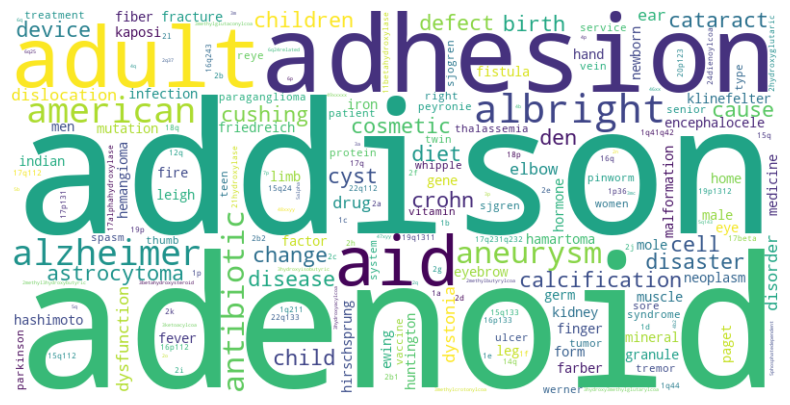

In [44]:
# Create a word cloud from the vocabulary
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(vocab))

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # No axes for the word cloud
plt.show()

In [47]:
#Print out the Shape of document matrix
input_data = df['Questions']
# Transform the input data using the pipeline
X_transformed = Pipe.named_steps['tfidf'].transform(input_data)  # Use your input data

# Check the shape of the document-term matrix
print("Shape of the document-term matrix:", X_transformed.shape)

Shape of the document-term matrix: (16407, 4720)


#### Test the chatbot

In [51]:
while True:
    # 3. User Input
    user_input = input('Enter question (type "bye" to exit): ')
    
    # 4. Check if the user wants to exit
    if user_input.lower() == 'bye':
        print('Goodbye!')
        break

    print(Pipe.predict([user_input])[0])

Enter question (type "bye" to exit):  what is alzheimer


This condition is inherited in an autosomal recessive pattern, which means both copies of the gene in each cell have mutations. The parents of an individual with an autosomal recessive condition each carry one copy of the mutated gene, but they typically do not show signs and symptoms of the condition.


Enter question (type "bye" to exit):  what is astrocytoma


This condition is inherited in an autosomal recessive pattern, which means both copies of the gene in each cell have mutations. The parents of an individual with an autosomal recessive condition each carry one copy of the mutated gene, but they typically do not show signs and symptoms of the condition.


Enter question (type "bye" to exit):  bye


Goodbye!
